<a href="https://colab.research.google.com/github/Leandrors91/analise_dados_pandas/blob/main/dio_proj_analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format
plt.style.use('ggplot')

In [91]:
df = pd.read_excel('/content/AdventureWorks.xlsx')
df.shape

(904, 16)

In [92]:
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

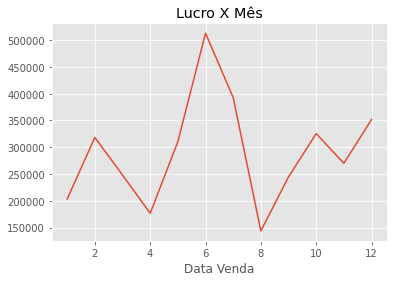

In [93]:
df['Custo Total'] = df['Custo Unitário'] * df['Quantidade']
df['Lucro'] = df['Valor Venda'] - df['Custo Total']
df.groupby(df['Data Venda'].dt.month)['Lucro'].sum().plot(title='Lucro X Mês');


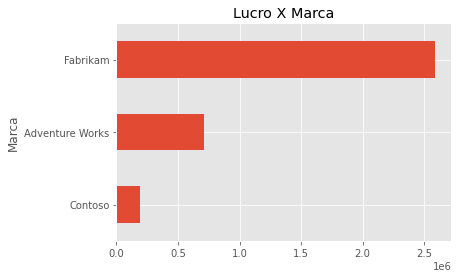

In [94]:
df.groupby('Marca')['Lucro'].sum().sort_values().plot.barh(title='Lucro X Marca');

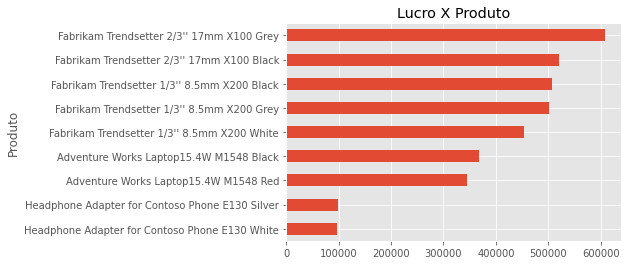

In [95]:
df.groupby('Produto')['Lucro'].sum().sort_values().plot.barh(title='Lucro X Produto');

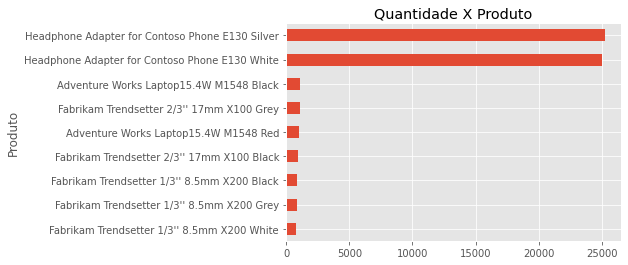

In [96]:
df.groupby('Produto')['Quantidade'].sum().sort_values().plot.barh(title='Quantidade X Produto');

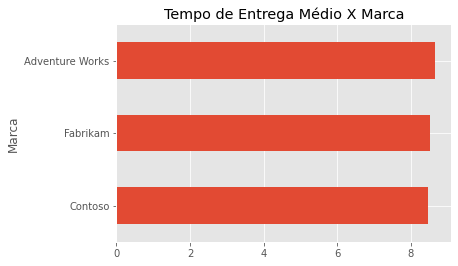

In [102]:
df['Tempo de Entrega'] = (df['Data Envio'] - df['Data Venda']).dt.days
df.groupby('Marca')['Tempo de Entrega'].mean().sort_values().plot.barh(title='Tempo de Entrega Médio X Marca');

In [98]:
lucro_ano = df.groupby([df['Data Venda'].dt.year, 'Marca']).sum().reset_index()
lucro_ano

,Data Venda,Marca,ID Loja,ID Produto,ID Cliente,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Custo Total,Lucro,Tempo de Entrega
0,2008,Adventure Works,28346,38616,1958392,35903.74,78074.00,908,65112.20,623151.80,316510.64,306641.16,881
1,2008,Contoso,21620,199720,1520909,407.20,799.20,14633,15285.70,130897.97,74481.97,56416.00,669
2,2008,Fabrikam,76472,341471,5432533,93853.59,283272.00,2671,212036.12,2433557.88,876537.33,1557020.55,2357
3,2009,Adventure Works,36866,50562,2572741,47058.30,102330.00,1228,97372.68,833451.32,428056.24,405395.08,1181
4,2009,Contoso,24552,229677,1753740,468.28,919.08,35607,36215.35,319498.58,181239.63,138258.95,788
5,2009,Fabrikam,56238,247570,3963985,68202.45,205851.00,1860,196945.41,1644048.59,609957.24,1034091.35,1847
